In [12]:

import pandas as pd
import tensorflow as tf
import time
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

In [2]:
df_train = pd.read_csv("/content/student-data-train.csv")
df_test = pd.read_csv("/content/student-data-test.csv")

In [3]:
df_train = df_train.drop('Alias', axis=1)
df_test = df_test.drop('Alias', axis=1)
print(df_train.columns)

Index(['Prestasi', 'NilaiUjian', 'PenghasilanOrtu', 'PunyaSejenisKIP',
       'KepemilikanRumah', 'Target'],
      dtype='object')


In [4]:
df_test.tail()

,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
17,0,92,1.8,1,2,1
18,0,47,1.7,1,2,0
19,0,59,2.9,0,2,0
20,0,88,3.8,0,2,0
21,0,87,3.9,0,2,0


In [5]:
df_train.tail()

,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
995,0,58,2.2,1,2,1
996,0,78,2.9,0,2,0
997,0,58,2.6,0,2,0
998,0,79,2.5,0,2,0
999,1,78,2.2,1,2,1


In [6]:
# Membagi data menjadi set pelatihan dan pengujian
x_train = df_train.drop('Target', axis=1).values
y_train = df_train['Target'].values

x_test = df_test.drop('Target', axis=1).values
y_test = df_test['Target'].values

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 2s 12ms/step - loss: 0.9173 - accuracy: 0.6760 - val_loss: 0.7223 - val_accuracy: 0.6818
Epoch 2/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6660 - accuracy: 0.6760 - val_loss: 0.7272 - val_accuracy: 0.6818
Epoch 3/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6606 - accuracy: 0.6760 - val_loss: 0.7208 - val_accuracy: 0.6818
Epoch 4/300
32/32 [==============================] - 0s 6ms/step - loss: 0.6584 - accuracy: 0.6760 - val_loss: 0.7094 - val_accuracy: 0.6818
Epoch 5/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 0.6760 - val_loss: 0.7110 - val_accuracy: 0.6818
Epoch 6/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6760 - val_loss: 0.7012 - val_accuracy: 0.6818
Epoch 7/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6760 - val_loss: 0.7045 - val_accuracy: 0.6818
Epoch 8/300
32/32 [=====

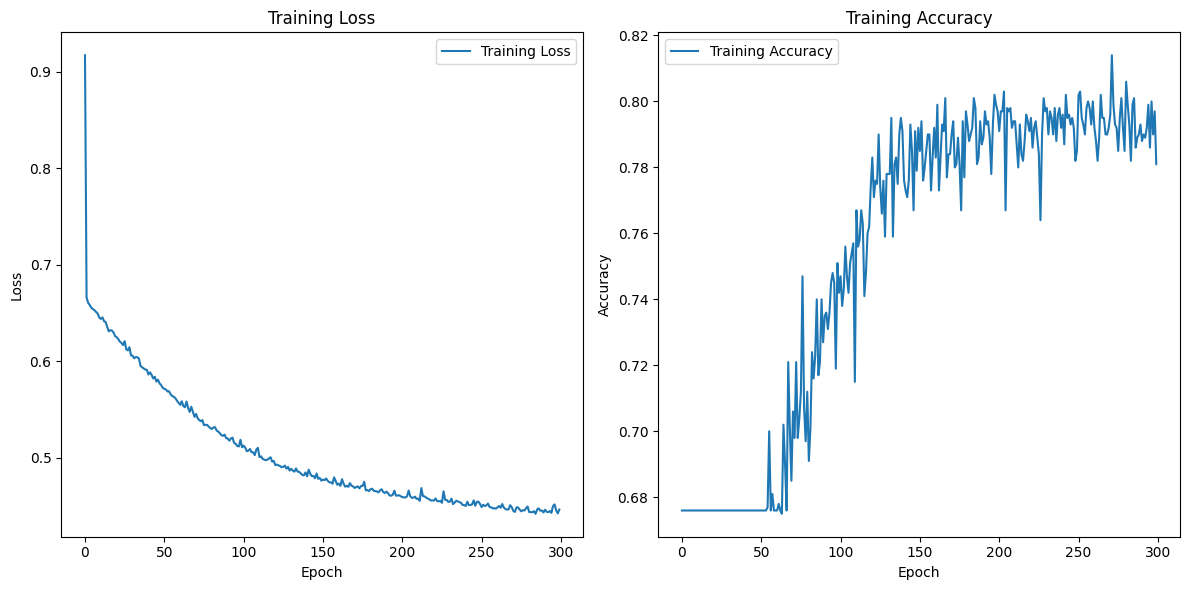

In [7]:
# Membangun model neural network
model = Sequential()
model.add(tf.keras.layers.Normalization(axis=-1))
model.add(Dense(64, activation='relu', input_dim=[6]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(9e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Mulai menghitung waktu pelatihan
start_time = time.time()

# Melatih model
history = model.fit(x_train, y_train,
                    epochs=300,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Menghentikan penghitungan waktu pelatihan dan mencetak waktu yang diperlukan
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

# Membuat plot dari histori pelatihan
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Melakukan prediksi pada data uji
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Mencetak confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

1/1 [==============================] - 0s 172ms/step
Confusion Matrix:
[[15  0]
 [ 0  7]]


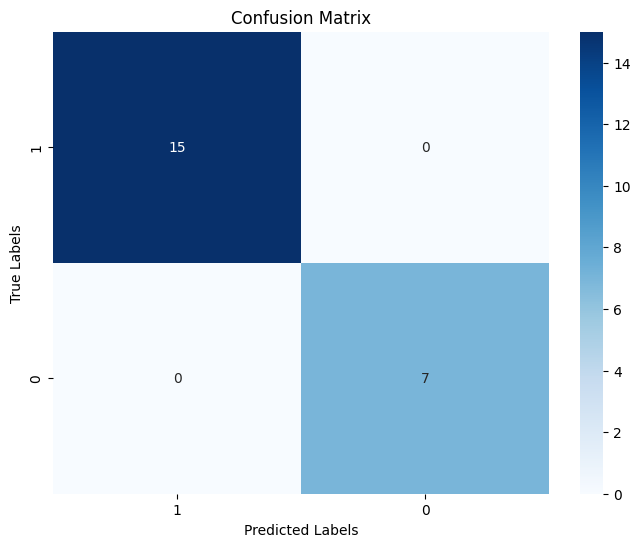

In [9]:
# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["1", "0"], yticklabels=["1", "0"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc_NN = accuracy_score(y_test, y_pred)
f1_NN = f1_score(y_test, y_pred)

# Menyimpan nilai-nilai ke dalam DataFrame
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Menampilkan tabel nilai-nilai metrik evaluasi
print(evaluation_metrics)

      Metric  Value
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-Score    1.0


In [10]:
#Menyimpan Model
import joblib
joblib.dump(model, 'model_klasifikasi_beasiswa.joblib')

['model_klasifikasi_beasiswa.joblib']

In [15]:
# Memuat model dari file
model = joblib.load('model_klasifikasi_beasiswa.joblib')

# Fungsi untuk mengubah indeks biner menjadi label kata
def indeks_ke_label(indeks):
    return "Tidak Dapat Beasiswa" if indeks == 0 else "Dapat Beasiswa"

# Menyiapkan nilai input manual (misalnya, satu set nilai fitur)
#Fitur Input(['Prestasi', 'NilaiUjian', 'PenghasilanOrtu', 'PunyaSejenisKIP','KepemilikanRumah']
nilai_input = np.array([[0, 90, 5.0, 1, 1]])
prediksi = model.predict(nilai_input)

# Mengonversi hasil prediksi menjadi indeks
kelas_prediksi = 1 if prediksi[0][0] > 0.5 else 0

print("Hasil Prediksi (Indeks):", kelas_prediksi)

# Mengonversi indeks prediksi menjadi label kata
label_prediksi = indeks_ke_label(kelas_prediksi)

# Menampilkan label kata hasil prediksi
print("Hasil Prediksi (Label Kata):", label_prediksi)

1/1 [==============================] - 0s 65ms/step
Hasil Prediksi (Indeks): 0
Hasil Prediksi (Label Kata): Tidak Dapat Beasiswa


##Silahkan buat model klasifikasi menggunakan metode SVM dan KNN.